# Lab 1. Kamaletdinova  

In [1]:
library(ggplot2)
library(gridExtra)
library(repr)

library(moments)

#### Plot data EDF and histogram

In [2]:
data = data.frame(value = scan("Number_4.txt"))
size = nrow(data)
head(data)

value
<dbl>
0.2521754
0.7925085
0.1006662
0.1231581
0.7458372
2.8327408


In [3]:
hist.raw <- ggplot(data, aes(x = value)) + 
            geom_histogram(bins = 5, aes(y = ..density..), 
                           color = "brown3", 
                           fill = "brown3",
                           alpha = .5) +
            theme_linedraw()

dist.raw <- ggplot(data, aes(x = value)) +
            stat_ecdf(geom = "step", color = "brown3") + 
            theme_linedraw()

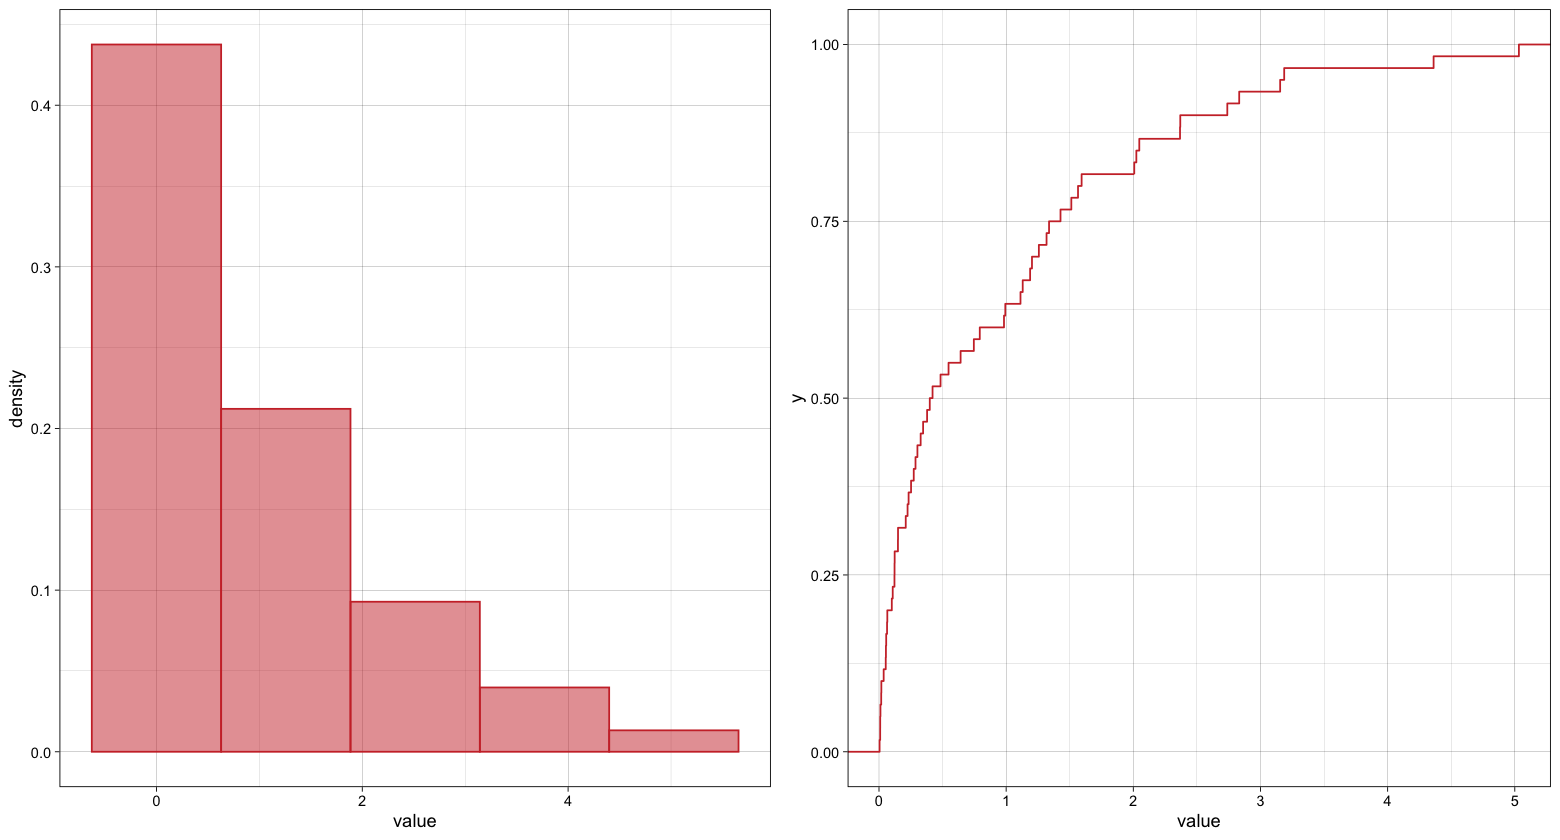

In [4]:
options(repr.plot.width = 13, repr.plot.height = 7)
grid.arrange(hist.raw, dist.raw, nrow = 1)

#### Count statictics

In [5]:
summary(data)[c(1, 6)]

mean <- mean(data$value)
sd <- sd(data$value)
skew <- skewness(data$value, na.rm = TRUE)
kurt <- kurtosis(data$value, na.rm = TRUE)

data.stats <- data.frame(mean = mean, Stand_dev = sd, Skewness = skew, Kurtosis = kurt)
data.stats

[1] "Min.   :0.004622  " "Max.   :5.032332  "

mean,Stand_dev,Skewness,Kurtosis
<dbl>,<dbl>,<dbl>,<dbl>
0.9480797,1.125668,1.631495,5.500693


$counts
[1] 34 15  6  5

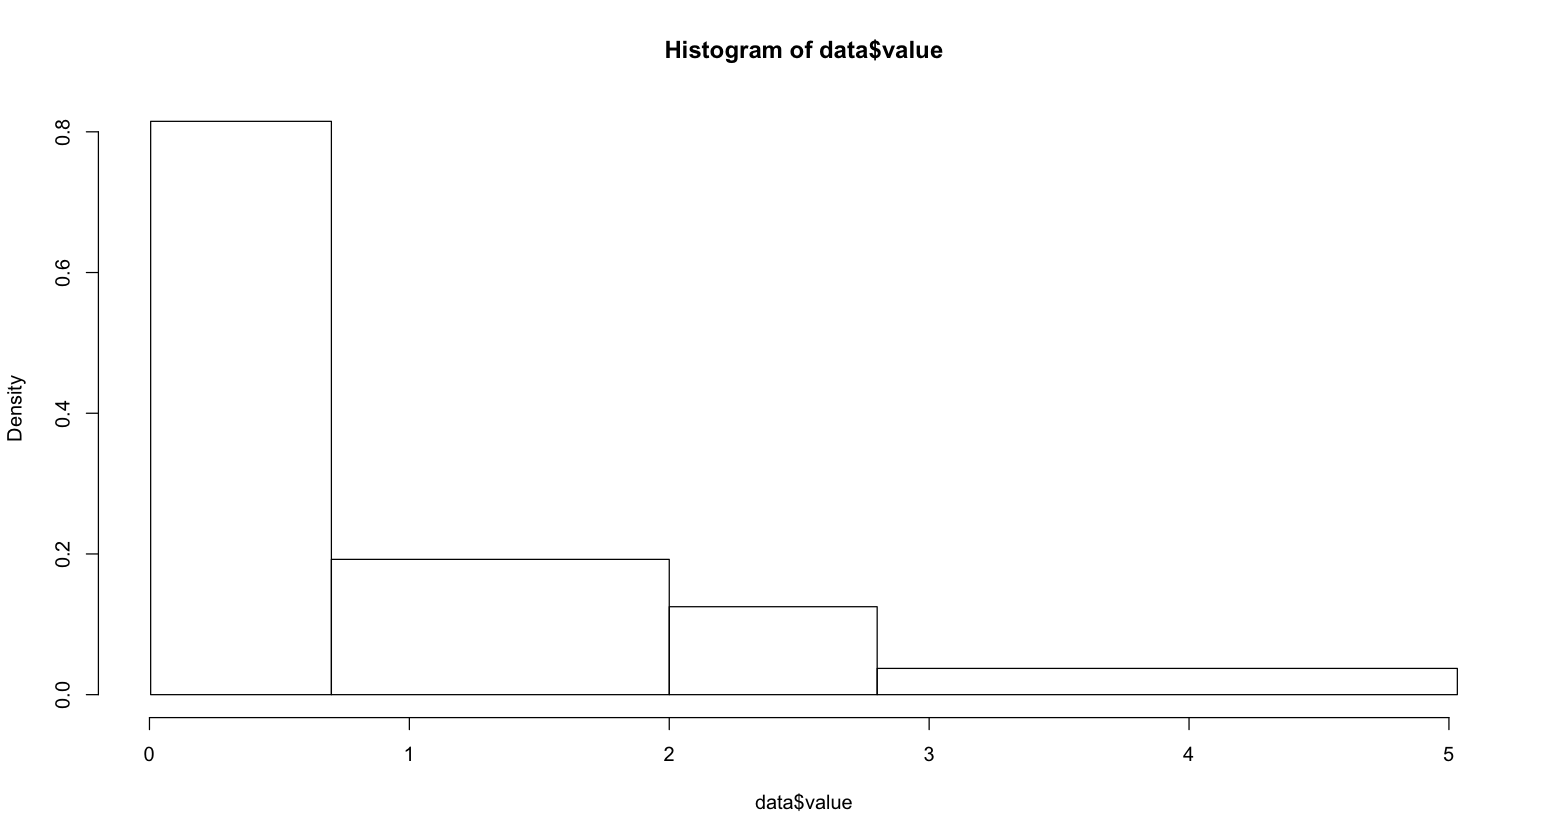

In [6]:
l <- hist(data$value, breaks = c(min(data), 0.7, 2, 2.8, max(data)))
l[2]

In [7]:
hist.freq <- ggplot(data, aes(x = value)) + 
             geom_histogram(aes(y = ..count..),
                            breaks = c(min(data), 0.7, 2, 2.8, max(data)),
                            color = "brown3", 
                            fill = "brown3",
                            alpha = .5) +
             theme_linedraw()

hist.norm <- ggplot(data, aes(x = value)) + 
             geom_histogram(aes(y = ..density..),
                            breaks = c(min(data), 0.7, 2, 2.8, max(data)),
                            color = "brown3", 
                            fill = "brown3",
                            alpha = .5) +
             theme_linedraw()

observations = ggplot_build(hist.freq)$data[[1]]$y

breaks_left = ggplot_build(hist.freq)$data[[1]]$xmin
breaks_right = ggplot_build(hist.freq)$data[[1]]$xmax

hist.intervals = data.frame(cbind(observations, 
                                  breaks_left, 
                                  breaks_right))
hist.intervals

observations,breaks_left,breaks_right
<dbl>,<dbl>,<dbl>
34,0.004622365,0.700000
15,0.700000000,2.000000
6,2.000000000,2.800000
5,2.800000000,5.032332


[1] 5

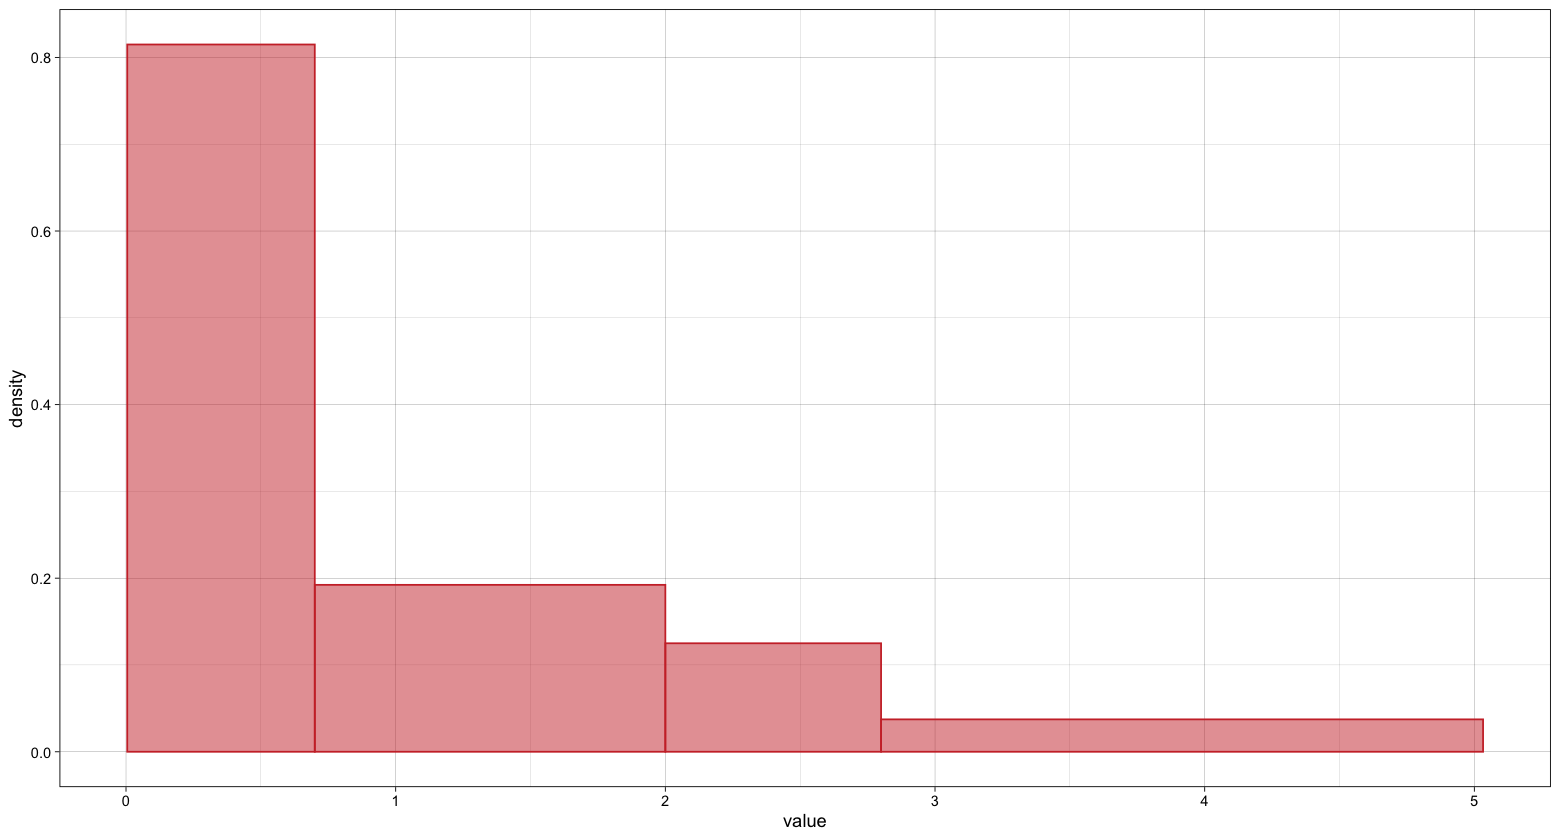

In [8]:
hist.norm

### Lognormal

In [9]:
stat_with_lnorm = function(par) {
    meanlog = par[1]
    sdlog = par[2]
    
    breaks_left_cdf = plnorm(breaks_left, 
                             meanlog = meanlog, 
                             sdlog = sdlog)
    breaks_right_cdf = plnorm(breaks_right, 
                              meanlog = meanlog, 
                              sdlog = sdlog)
    
    h0_probs = breaks_right_cdf - breaks_left_cdf
    expected = h0_probs * size
    
    return (sum((observations - expected)^2 /  expected))
}

### Exponential

In [10]:
stat_with_exp = function(par) {
    rate = par[1]
    
    breaks_left_cdf = pexp(breaks_left, rate = rate)
    breaks_right_cdf = pexp(breaks_right, rate = rate)
    
    h0_probs = breaks_right_cdf - breaks_left_cdf
    expected = h0_probs * size
    
    return (sum((observations - expected)^2 /  expected))
}

### Gamma

In [11]:
stat_with_gamma = function(par) {
    shape = par[1]
    scale = par[2]
    
    breaks_left_cdf = pgamma(breaks_left, shape = shape,
                             scale = scale)
    breaks_right_cdf = pgamma(breaks_right, shape = shape,
                              scale = scale)
    
    h0_probs = breaks_right_cdf - breaks_left_cdf
    expected = h0_probs * size
    
    return (sum((observations - expected)^2 /  expected))
}

Exponential

In [12]:
res = optim(c(2), stat_with_exp, method = "L-BFGS-B")
res
pars_exp = res$par

$par
[1] 0.9416432

$value
[1] 3.842601

$counts
function gradient 
       6        6 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

Gamma

In [13]:
res = optim(c(1, 1), stat_with_gamma)
res
pars_gamma = res$par

$par
[1] 0.5642068 1.9933659

$value
[1] 1.065541

$counts
function gradient 
      79       NA 

$convergence
[1] 0

$message
NULL

Lognorm

In [14]:
res = optim(c(0, 1), stat_with_lnorm, method = "L-BFGS-B")
res
pars_lognorm = res$par

$par
[1] -0.4103751  1.4393122

$value
[1] 1.66785

$counts
function gradient 
       9        9 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

df = nbins - 1 = 3 xhisq with alpha = 0.05 is 7.815

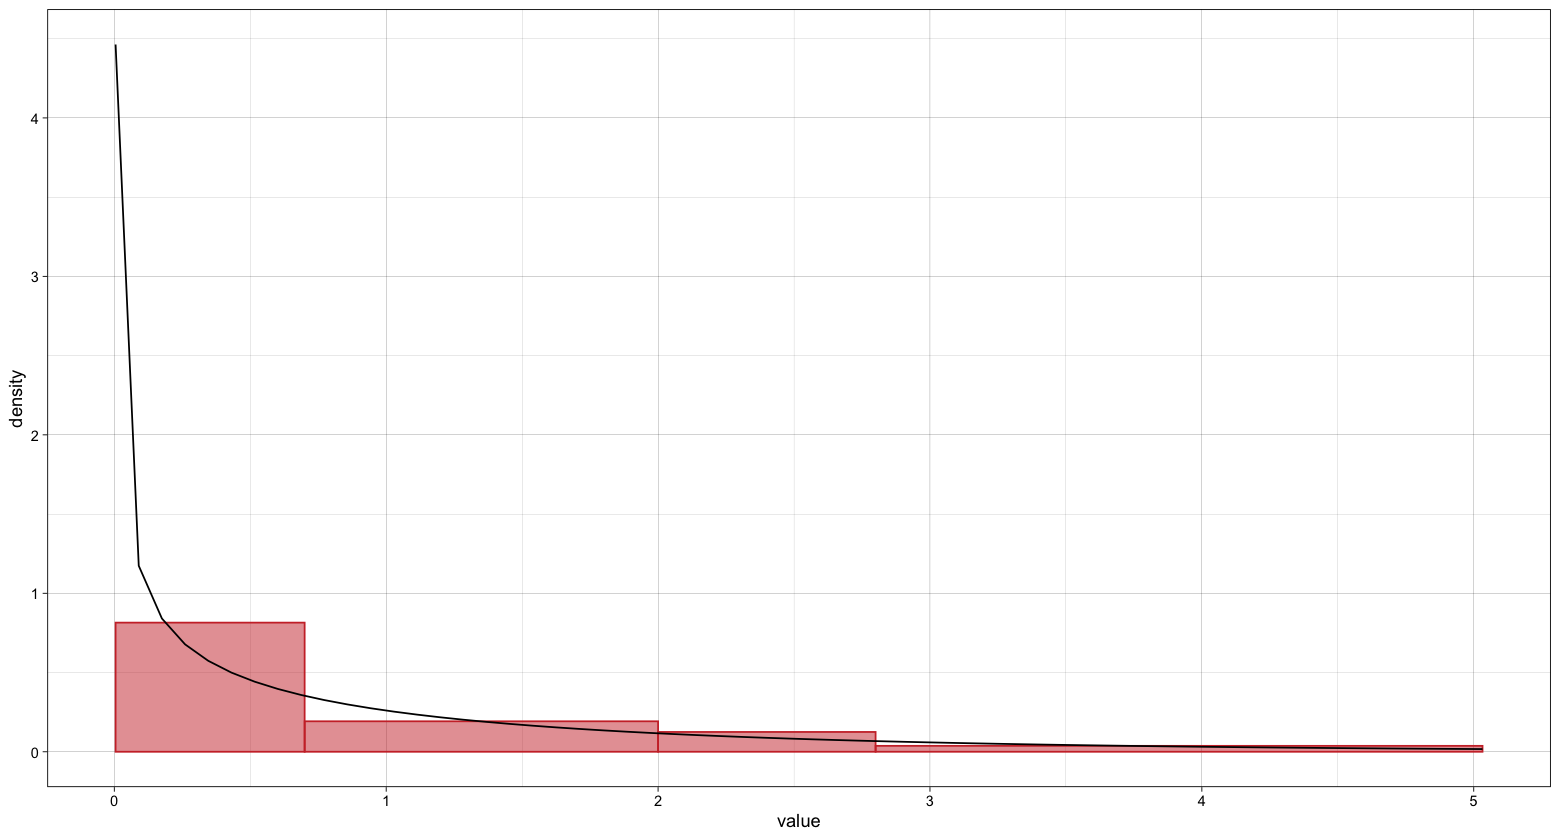

In [29]:
gamma_dens = dgamma(seq(breaks_left[1], breaks_right[4], 
                        length.out = 60), 
                    shape = pars_gamma[1],
                    scale = pars_gamma[2])


x = seq(breaks_left[1], breaks_right[4], 
        length.out = 60)

hist.norm  +
#geom_density(color = "darkslategray4") + 
geom_line(aes(x = x, y = gamma_dens))

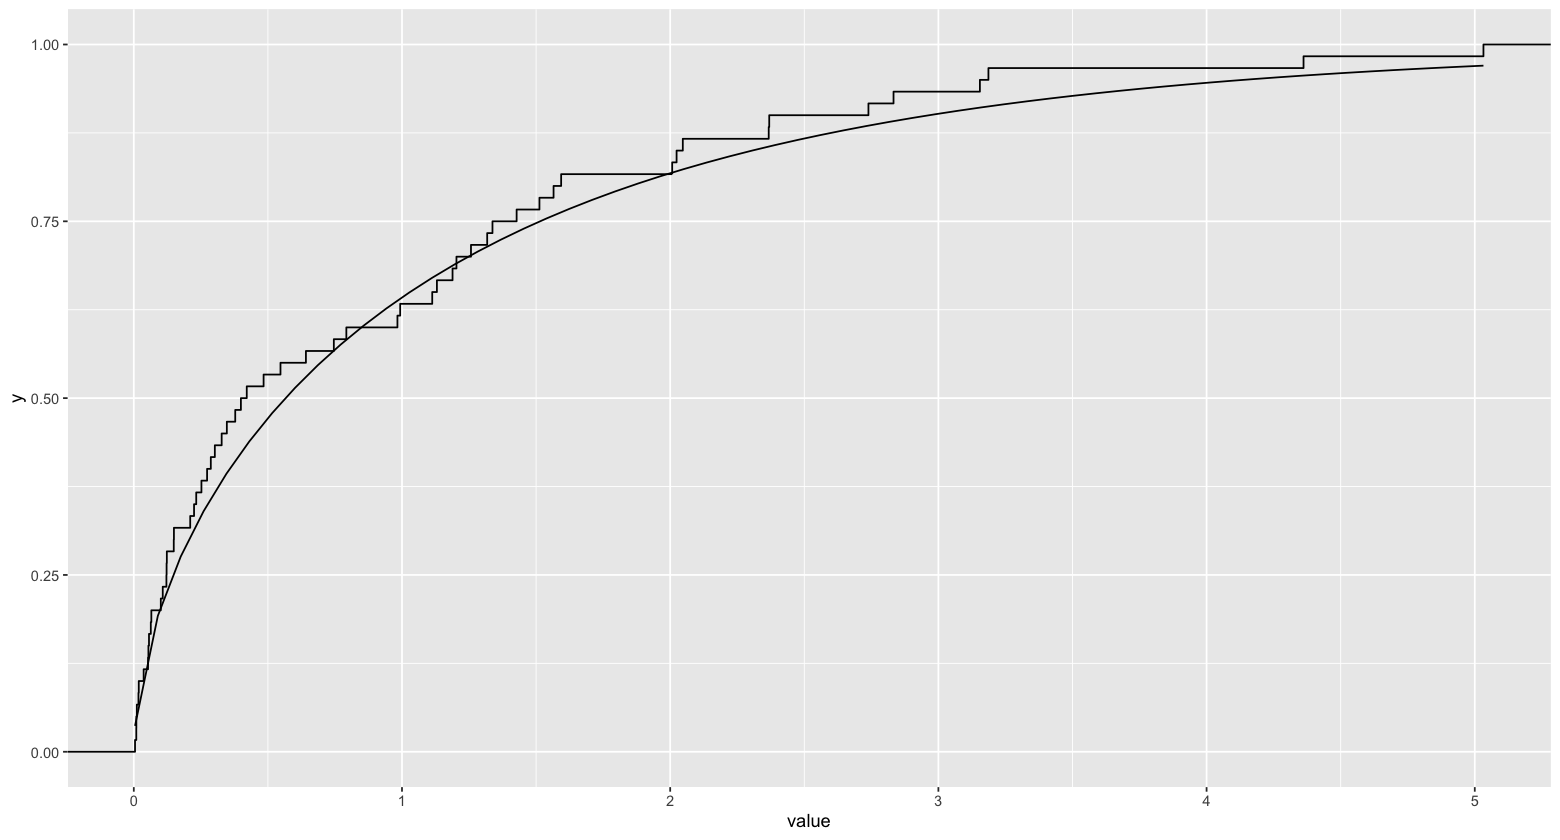

In [51]:
gamma_dist = pgamma(seq(breaks_left[1], breaks_right[4], 
                        length.out = 60), 
                    shape = pars_gamma[1],
                    scale = pars_gamma[2])

gamma_ecdf = ecdf(data$value)
ggplot(data, aes(value)) + stat_ecdf(geom = "step") +
                           geom_line(aes(x = x, y = gamma_dist))

In [34]:
gamma_dens = dgamma(seq(breaks_left[1], breaks_right[4], 
                        length.out = 60), 
                    shape = pars,
                    scale = 3.84)

x = seq(breaks_left[1], breaks_right[4], 
        length.out = 60)

hist.norm  +
geom_density(color = "darkslategray4") + 
geom_line(aes(x = x, y = gamma_dens))

ERROR: Error in dgamma(seq(breaks_left[1], breaks_right[4], length.out = 60), : объект 'pars' не найден


In [20]:
lnormal_dens = plnorm(seq(breaks_left[1], breaks_right[4], length.out = 60), 
                       logmean = pars_lognorm[1], 
                       logsd = pars_lognorm[2])
x = seq(breaks_left[1], breaks_right[4], length.out = 60)

hist.norm  +
geom_density(color = "darkslategray4") + 
geom_line(aes(x = x, y = lnormal_dens))

ERROR: Error in plnorm(seq(breaks_left[1], breaks_right[4], length.out = 60), : неиспользованные аргументы (logmean = pars_lognorm[1], logsd = pars_lognorm[2])
